### Step 1: Import packages

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

### Step 2: Define working directories

In [2]:
path_raw_data = 'C:/Users/britt/Desktop/W207/final_project/raw_data/'

### Step 3: Load raw movies data

In [3]:
# Import the movies dataset
movies_df = pd.read_csv(path_raw_data + 'movies_metadata.csv', low_memory=False)

### Step 4: Basic EDA of the raw movies' dataset

In [4]:
# There are over 45k entries in the movies' dataset
len(movies_df)

45466

In [5]:
# Inspect the movies columns
# Belongs to collection contains dictionaries
# Genres and spoken languages contain lists of dictionaries, each with a name field that will need to be extracted
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
# Some fields have unexpected types
# During processing, we'll change budget to float and release_date to a datetime
movies_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [7]:
# Some columns contain missing values that will need to be addressed
# The number is greater than shown, due to empty lists within some fields
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [8]:
# There are few adult movies in the dataset, as well as 2 movies with descriptions in this field
# We can drop rows with nonsensical values during processing
movies_df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [9]:
# The majority of movies don't belong to a collection
print(sum(~movies_df['belongs_to_collection'].isna()))
print(sum(movies_df['belongs_to_collection'].isna()))

4494
40972


In [10]:
# The majority of movies are in English, so let's consider narrowing the dataset to these
movies_df.original_language.value_counts()

en       32269
fr        2438
it        1529
ja        1350
de        1080
         ...  
si           1
cy           1
gl           1
fy           1
104.0        1
Name: original_language, Length: 92, dtype: int64

In [11]:
# Comparatively few movies have 100+ ratings - only 13.3%
"{:.1%}".format(len(movies_df[movies_df.vote_count >= 100])/len(movies_df))

'13.3%'

In [12]:
# English movies 
# 25% of movies have 3 or less votes
print(movies_df[movies_df.original_language == 'en'].vote_count.quantile(.25))

# Half of movies have 10 or fewer votes
print(movies_df[movies_df.original_language == 'en'].vote_count.quantile(.5))

# Only 25% of English films have 43 or more votes
print(movies_df[movies_df.original_language == 'en'].vote_count.quantile(.75))

# The 90th percentile for ratings for English films is 241 votes
print(movies_df[movies_df.original_language == 'en'].vote_count.quantile(.9))

# One English film has >14k ratings
print(movies_df[movies_df.original_language == 'en'].vote_count.max())

3.0
10.0
43.0
241.0
14075.0


In [13]:
# Non-English movies have lower total ratings than English films for the median, 3rd quartile, 90th percentile, and max
# 25% of movies have 3 or less votes
print(movies_df[movies_df.original_language != 'en'].vote_count.quantile(.25))

# Half of movies have 10 or fewer votes
print(movies_df[movies_df.original_language != 'en'].vote_count.quantile(.5))

# 25% of movies have 23 or more votes
print(movies_df[movies_df.original_language != 'en'].vote_count.quantile(.75))

# Only 10% of non-English movies have >=63 votes
print(movies_df[movies_df.original_language != 'en'].vote_count.quantile(.9))

# The highets number of ratings for a non-English film is 5410 ratings
print(movies_df[movies_df.original_language != 'en'].vote_count.max())

3.0
9.0
23.0
63.0
5410.0


#### Find the most common release decades

In [14]:
# Filter the dataframe for movies with a status of released and a value for release date
filtered_movies = movies_df[(movies_df.status == 'Released') & (movies_df.release_date.notnull())]

In [15]:
# The number of movies released is much higher in some years than others
pd.to_datetime(filtered_movies['release_date']).dt.year.value_counts()[:25]

2014    1962
2013    1881
2015    1874
2012    1708
2011    1645
2009    1575
2016    1574
2010    1477
2008    1460
2007    1314
2006    1260
2005    1115
2004     980
2002     891
2003     873
2001     850
2000     777
1999     718
1998     714
1997     656
1996     626
1995     592
1994     535
2017     505
1993     488
Name: release_date, dtype: int64

In [16]:
# Extract the release decade of each film
filtered_movies['release_date'] = pd.to_datetime(filtered_movies['release_date'])
filtered_movies['release_decade'] = (filtered_movies.release_date.dt.year//10)*10

<ipython-input-16-a153f625bb4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies['release_date'] = pd.to_datetime(filtered_movies['release_date'])
<ipython-input-16-a153f625bb4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies['release_decade'] = (filtered_movies.release_date.dt.year//10)*10


In [17]:
# Create a dataframe of release decade and the count of films released
movies_released_by_decade = pd.DataFrame(filtered_movies.release_decade.value_counts()).reset_index()
movies_released_by_decade.rename(columns = {'index':'decade','release_decade': 'count_released'}, inplace = True)
movies_released_by_decade.sort_values(by='decade', inplace=True)

# Create a dataframe of total ratings received by film's release decade
vote_count_by_release_decade = pd.DataFrame(filtered_movies.groupby(['release_decade'])['vote_count'].sum()).reset_index()

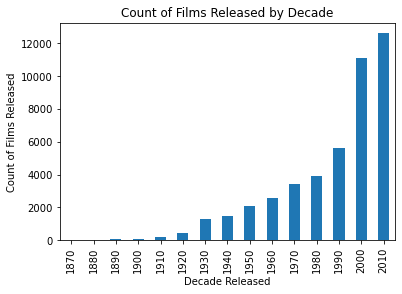

In [18]:
# The greatest number of films released in a given decade was in 2010
movies_released_by_decade.plot.bar(x='decade', y='count_released', legend=None)
plt.xlabel('Decade Released')
plt.ylabel('Count of Films Released')
plt.title('Count of Films Released by Decade')
plt.show()

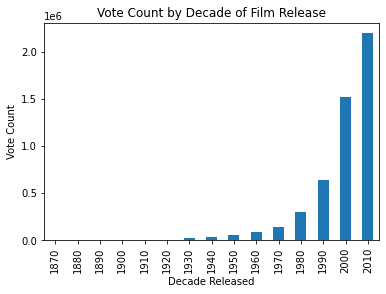

In [19]:
# Films released in 2010 also received the greatest number of ratings from viewers
vote_count_by_release_decade.plot.bar(x='release_decade', y='vote_count', legend=None)
plt.xlabel('Decade Released')
plt.ylabel('Vote Count')
plt.title('Vote Count by Decade of Film Release')
plt.show()